<a href="https://colab.research.google.com/github/SrihithaReddy13/bitcoin_node_trustworthiness/blob/main/Final_Review_Trust_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#from google.colab import files
#uploaded = files.upload()
#import io
#df = pd.read_csv(io.BytesIO(uploaded['soc-sign-bitcoinotc.csv']))
df=pd.read_csv("soc-sign-bitcoinotc.csv",header=None)

In [ ]:
df.columns=['src','dst','rating','time']
Graph=df.iloc[:,:3]

In [ ]:
unique=list(Graph['src'])
unique.extend(Graph['dst'])
unique=list(set(unique))
NumUniqueVertices=len(unique)
print("Number of unique Vertices:",NumUniqueVertices)

Number of unique Vertices: 5881


In [ ]:
NumVertices=400

In [ ]:
for i in range(len(Graph)):
    if (Graph['src'][i]<NumVertices)&(Graph['dst'][i]<NumVertices):
        pass
    else:
        Graph.drop(i,inplace=True)
print(Graph)

       src  dst  rating
0        6    2       4
1        6    5       2
2        1   15       1
3        4    3       7
4       13   16       8
...    ...  ...     ...
35221   13  353       6
35332   33   35       4
35359   96    6     -10
35444  215   33       1
35445   33  215       1

[2086 rows x 3 columns]


In [ ]:
Graph.reset_index(inplace=True,drop=True)

In [ ]:
Graph

,src,dst,rating
0,6,2,4
1,6,5,2
2,1,15,1
3,4,3,7
4,13,16,8
...,...,...,...
2081,13,353,6
2082,33,35,4
2083,96,6,-10
2084,215,33,1


In [ ]:
len(Graph.dst.unique())

359

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


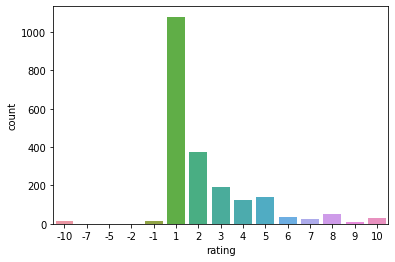

In [ ]:
import seaborn as sns
sns.countplot(Graph.rating)

In [ ]:
results_cf=[0]*7
results_accuracy=[0]*7
results_precision=[0]*7
results_recall=[0]*7
results_f1=[0]*7
results_auc=[0]*7

##EIGEN TRUST MODEL##

In [ ]:
sat=[[0 for i in range(NumVertices)] for j in range(NumVertices)]
unsat=[[0 for i in range(NumVertices)] for j in range(NumVertices)]
for i in range(1,NumVertices):
    for j in range(1,NumVertices):
        appl=pd.DataFrame(Graph[(Graph['src']==i)&(Graph['dst']==j)]['rating'])
        appl.reset_index(inplace=True,drop=True)
        pos=0
        neg=0
        #print(len(appl))
        #print(appl)
        for k in range(len(appl)):
            if appl['rating'][k]>=0:
                pos+=1
            else:
                neg+=1
        sat[i][j]=pos
        unsat[i][j]=neg
print(sat)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print(sat)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print(unsat)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
s=[[0 for i in range(NumVertices)] for j in range(NumVertices)]
for i in range(NumVertices):
    for j in range(NumVertices):
        s[i][j]=max(sat[i][j]-unsat[i][j],0)
print(s)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
sumv=[0 for i in range(NumVertices)]
for i in range(NumVertices):
    sv=0
    for j in range(NumVertices):
        sv+=s[i][j]
    sumv[i]=sv
print(sumv)

[0, 97, 28, 0, 27, 3, 16, 118, 1, 1, 8, 0, 0, 28, 0, 8, 0, 13, 0, 6, 0, 16, 0, 11, 0, 0, 2, 0, 6, 25, 0, 2, 3, 8, 3, 30, 12, 8, 0, 19, 0, 37, 0, 0, 2, 10, 1, 2, 0, 0, 0, 6, 1, 2, 7, 1, 7, 10, 0, 0, 63, 5, 14, 0, 34, 1, 1, 0, 5, 7, 5, 1, 4, 0, 1, 7, 3, 19, 8, 1, 11, 6, 0, 1, 0, 0, 1, 2, 5, 2, 0, 0, 0, 6, 1, 2, 12, 2, 0, 1, 8, 3, 0, 0, 26, 1, 1, 2, 4, 3, 12, 4, 14, 18, 5, 8, 1, 0, 0, 3, 2, 0, 2, 0, 0, 7, 0, 2, 0, 2, 0, 0, 28, 1, 9, 23, 0, 2, 2, 3, 1, 12, 10, 19, 20, 1, 3, 2, 4, 23, 3, 0, 3, 4, 1, 2, 7, 2, 1, 8, 3, 3, 2, 3, 2, 1, 10, 9, 1, 1, 1, 17, 1, 3, 2, 1, 4, 4, 9, 2, 3, 5, 1, 3, 4, 2, 8, 1, 1, 2, 1, 1, 4, 2, 3, 1, 1, 0, 23, 5, 4, 2, 59, 7, 8, 0, 15, 2, 2, 5, 1, 1, 6, 1, 6, 16, 2, 3, 1, 15, 0, 8, 6, 0, 5, 3, 0, 3, 5, 3, 3, 3, 1, 1, 2, 5, 2, 1, 2, 8, 3, 5, 3, 4, 4, 4, 1, 1, 3, 12, 2, 6, 1, 1, 4, 1, 11, 79, 2, 2, 0, 2, 2, 1, 0, 2, 8, 1, 5, 4, 11, 2, 3, 9, 9, 1, 3, 1, 2, 1, 8, 0, 5, 6, 4, 6, 2, 1, 6, 1, 1, 1, 1, 4, 1, 7, 1, 2, 2, 2, 2, 3, 0, 1, 15, 1, 1, 1, 4, 8, 4, 1, 5, 2, 2, 0, 2, 2,

In [ ]:
c=[[0 for i in range(NumVertices)] for j in range(NumVertices)]
for i in range(NumVertices):
    for j in range(NumVertices):
        if sumv[i]==0:
            c[i][j]=1/NumVertices
        else:
            c[i][j]=s[i][j]/sumv[i]
print(c)

[[0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025

In [ ]:
c=np.array(c)
c=np.transpose(c)
prevT=[1/NumVertices for i in range(NumVertices)]
T=prevT
delt=1000
while delt>0.5:
    temp=T
    T=c.dot(prevT)
    prevT=temp
    delt=abs(sum(T-prevT))
print(T)
print(sum(T))

[0.00045    0.05535387 0.00523939 0.00349676 0.01443978 0.00065321
 0.00531947 0.08256283 0.00094452 0.00047577 0.00094513 0.00045
 0.00045    0.00901813 0.00045    0.00440596 0.00053929 0.00312555
 0.00045    0.00112932 0.0021374  0.00498918 0.00045    0.00605589
 0.00045    0.00552529 0.00062593 0.00045    0.00348257 0.00916086
 0.00045    0.00056837 0.0008593  0.00175808 0.00058625 0.02183048
 0.00537029 0.00356075 0.00045    0.0073675  0.00045    0.02775488
 0.00045    0.00045    0.00089408 0.00597004 0.00065833 0.00049696
 0.00045    0.00045    0.00045    0.00169276 0.00055    0.00072119
 0.0023541  0.00047119 0.00075163 0.00237264 0.00045    0.00045
 0.04836614 0.00212852 0.012057   0.00045    0.0168784  0.00053333
 0.00054259 0.00045    0.00188806 0.00471659 0.00237173 0.00047577
 0.00079195 0.00045    0.00047577 0.00290844 0.00070529 0.00349821
 0.00346379 0.00053333 0.00349826 0.00315944 0.00045    0.00051757
 0.00045    0.00045    0.00051757 0.00058228 0.00081536 0.00053875
 

In [ ]:
TrueLabel=[]
print(1/NumVertices)
for i in range(len(T)):
    if T[i]<1/NumVertices:
        TrueLabel.append("UnTrustWorthy")
    else:
        TrueLabel.append("TrustWorthy")

0.0025


In [ ]:
print(TrueLabel.count("UnTrustWorthy"))
print(TrueLabel)

312
['UnTrustWorthy', 'TrustWorthy', 'TrustWorthy', 'TrustWorthy', 'TrustWorthy', 'UnTrustWorthy', 'TrustWorthy', 'TrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'TrustWorthy', 'UnTrustWorthy', 'TrustWorthy', 'UnTrustWorthy', 'TrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'TrustWorthy', 'UnTrustWorthy', 'TrustWorthy', 'UnTrustWorthy', 'TrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'TrustWorthy', 'TrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'TrustWorthy', 'TrustWorthy', 'TrustWorthy', 'UnTrustWorthy', 'TrustWorthy', 'UnTrustWorthy', 'TrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'TrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'TrustWorthy', 

In [ ]:
len(TrueLabel)

400

##GOODNESS AND FAIRNESS##


In [ ]:
Graph.head()

,src,dst,rating
0,6,2,4
1,6,5,2
2,1,15,1
3,4,3,7
4,13,16,8


In [ ]:
len(Graph)

2086

In [ ]:
import networkx as nx
import math

def initialize_scores(G):
    fairness = {}
    goodness = {}
    #initialize
    nodes = G.nodes()
    for node in nodes:
        fairness[node] = 1
        try:
            goodness[node] = G.in_degree(node, weight='weight')*1.0/G.in_degree(node)
        except:
            goodness[node] = 0
    return fairness, goodness

In [ ]:
def compute_fairness_goodness(G):
    fairness, goodness = initialize_scores(G)
    nodes = G.nodes()
    iter = 0
    while iter < 100:
        df = 0
        dg = 0

        print('-----------------')
        print("Iteration number", iter)
        for node in nodes: 
            inedges = G.in_edges(node, data='weight') #Return two tuples (u,v) (False) or three-tuples (u,v,data) (True).
            g = 0
            for edge in inedges:
                g += fairness[edge[0]]*edge[2]
            try:
                dg += abs(g/len(inedges) - goodness[node])
                goodness[node] = g/len(inedges)
            except:
                pass
        for node in nodes:
            outedges = G.out_edges(node, data='weight')
            f = 0
            for edge in outedges:
                f += 1.0 - abs(edge[2] - goodness[edge[1]])/2.0
            try:
                df += abs(f/len(outedges) - fairness[node])
                fairness[node] = f/len(outedges)
            except:
                pass
        print('Differences in fairness score and goodness score = %.6f, %.6f' % (df, dg))
        if df < math.pow(10, -6) and dg < math.pow(10, -6):
            break
        iter+=1
    
    return fairness, goodness

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(range(1,NumVertices+1))

In [ ]:
for i in range(len(df)):
  if df['src'][i]<NumVertices and df['dst'][i]<NumVertices:
    G.add_edge(df['src'][i], df['dst'][i], weight = float(df['rating'][i]/10.0)) ## the weight should already be in the range of -1 to 1
#f.close()

In [ ]:
G.number_of_edges()


2086

In [ ]:
G.number_of_nodes()

400

In [ ]:
# these two dictionaries have the required scores
fairness, goodness = compute_fairness_goodness(G)

-----------------
Iteration number 0
Differences in fairness score and goodness score = 21.665572, 0.000000
-----------------
Iteration number 1
Differences in fairness score and goodness score = 1.998169, 5.369501
-----------------
Iteration number 2
Differences in fairness score and goodness score = 0.048165, 0.288950
-----------------
Iteration number 3
Differences in fairness score and goodness score = 0.003168, 0.022773
-----------------
Iteration number 4
Differences in fairness score and goodness score = 0.000268, 0.002158
-----------------
Iteration number 5
Differences in fairness score and goodness score = 0.000025, 0.000210
-----------------
Iteration number 6
Differences in fairness score and goodness score = 0.000002, 0.000021
-----------------
Iteration number 7
Differences in fairness score and goodness score = 0.000000, 0.000002
-----------------
Iteration number 8
Differences in fairness score and goodness score = 0.000000, 0.000000


In [ ]:
gf_nodes=pd.DataFrame(columns=['goodness','fairness','trust','node'])
gf_nodes['node']=fairness.keys()
gf_nodes['goodness']=goodness.values()
gf_nodes['fairness']=fairness.values()
gf_nodes.head()

,goodness,fairness,trust,node
0,0.337069,0.914064,NaN,1
1,0.330987,0.896217,NaN,2
2,0.261562,1.000000,NaN,3
3,0.306018,0.884511,NaN,4
4,0.215299,0.948035,NaN,5


In [ ]:
len(gf_nodes)

400

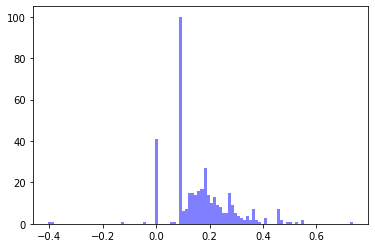

In [ ]:
import matplotlib.pyplot as plt
plt.hist(gf_nodes.goodness, bins=100, histtype='stepfilled', color='blue', alpha=0.5, edgecolor='none');

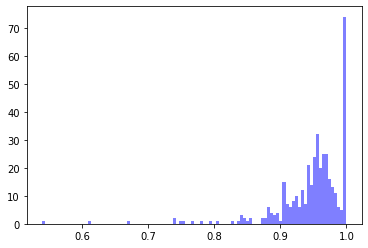

In [ ]:
import matplotlib.pyplot as plt
plt.hist(gf_nodes.fairness, bins=100, histtype='stepfilled', color='blue', alpha=0.5, edgecolor='none');

In [ ]:
from collections import OrderedDict 
sorted_f=OrderedDict()
for x in sorted(fairness.keys()):
  sorted_f[x]=fairness[x]

sorted_g=OrderedDict()
for x in sorted(goodness.keys()):
  sorted_g[x]=goodness[x]

In [ ]:
new_gf=pd.DataFrame(columns=['node','goodness','fairness','trust'])

In [ ]:
for i in range(1,NumVertices+1):
  try:
    a=sorted_f[i]
    b=sorted_g[i]
    new_gf.loc[i,:]=[i,b,a,'NaN']
  except:
    pass

In [ ]:
new_gf.head() #sorted with node numbers

,node,goodness,fairness,trust
1,1,0.337069,0.914064,NaN
2,2,0.330987,0.896217,NaN
3,3,0.261562,1,NaN
4,4,0.306018,0.884511,NaN
5,5,0.215299,0.948035,NaN


In [ ]:
gmean=new_gf['goodness'].mean(axis=0)

In [ ]:
fmean=new_gf['fairness'].mean(axis=0)

In [ ]:
for i in new_gf.index:
  if new_gf['goodness'][i]>gmean and new_gf['fairness'][i]>fmean:
    new_gf['trust'][i]='TrustWorthy'
  else:
    new_gf['trust'][i]='UnTrustWorthy'

In [ ]:
new_gf['trust'].value_counts()

UnTrustWorthy    306
TrustWorthy       94
Name: trust, dtype: int64

##PERFORMANCE EVALUATION GF ALGO##


In [ ]:
from sklearn.metrics import confusion_matrix
results_cf[0]=confusion_matrix(TrueLabel, new_gf['trust'])
print(results_cf[0])

[[ 20  68]
 [ 74 238]]


In [ ]:
y_gf_true=[1 if i=='TrustWorthy' else 0 for i in TrueLabel]
y_gf_pred=[1 if i=='TrustWorthy' else 0 for i in new_gf['trust']]

In [ ]:
from sklearn.metrics import accuracy_score
results_accuracy[0]=(accuracy_score(y_gf_true, y_gf_pred))
print(results_accuracy[0])

0.645


In [ ]:
from sklearn.metrics import precision_score
results_precision[0]=precision_score(y_gf_true, y_gf_pred)
print(results_precision[0])

0.2127659574468085


In [ ]:
from sklearn.metrics import recall_score
results_recall[0]=recall_score(y_gf_true, y_gf_pred)
print(results_recall[0])

0.22727272727272727


In [ ]:
from sklearn.metrics import f1_score
results_f1[0]=f1_score(y_gf_true, y_gf_pred,average="weighted")
print(results_f1[0])

0.6491283473807745


In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_gf_true, y_gf_pred)
results_auc[0]=metrics.auc(fpr, tpr)
print(results_auc[0])

0.49504662004662003


##CLUSTERING##

In [ ]:
import networkx as nx
GraphLess=Graph[(Graph['src']<NumVertices)&(Graph['dst']<NumVertices)]
GraphLess=GraphLess.reset_index()
GraphLess=GraphLess.drop('index',axis=1)
G = nx.Graph()
#G.add_nodes_from(range(1,NumVertices))
for i in range(len(GraphLess)):
    G.add_edge(GraphLess['src'][i],GraphLess['dst'][i])

In [ ]:
bet_centrality = nx.betweenness_centrality(G, normalized = True,endpoints = False)   
print(bet_centrality) 

{6: 0.013704506997910463, 2: 0.01680731240563494, 5: 0.0, 1: 0.19666232531949532, 15: 0.004630969278404759, 4: 0.03353822609801683, 3: 0.002685057743094015, 13: 0.017327449919884153, 16: 0.0, 10: 0.0006257160340566648, 7: 0.26582585956349736, 21: 0.012932626387227196, 20: 0.00042518698957340345, 8: 0.0, 17: 0.004087091028664111, 23: 0.00900494201215362, 25: 0.002360019779610562, 26: 0.0, 28: 0.003679192553813414, 29: 0.029372830212946982, 31: 0.0, 32: 1.7265897037453654e-05, 34: 0.0, 35: 0.056100146436440165, 36: 0.010720520449988523, 37: 0.001258440852583686, 44: 3.467628741407955e-05, 39: 0.015373033451375077, 45: 0.00510656333192827, 19: 0.000507598538793942, 46: 0.0, 47: 0.0, 51: 0.0003575081231822431, 52: 0.0, 53: 0.00022312792334111116, 54: 0.0008010273655478653, 41: 0.08429251769395141, 55: 0.0, 57: 0.0011413108011826196, 61: 0.00037133567615100984, 65: 0.0, 56: 0.0010351126786548263, 66: 0.0, 69: 0.00613848385068457, 70: 0.0017355615603308998, 71: 0.0, 72: 8.660271656106168e-05

In [ ]:
#Page Rank
pr = nx.pagerank(G, alpha = 0.8) 
  
# G is the Karate Social Graph 
print(pr) 

{6: 0.007053087144616485, 2: 0.00992535412475661, 5: 0.0013934109321088752, 1: 0.03573225574809638, 15: 0.0038433224677409086, 4: 0.010003898519053958, 3: 0.004299292422136327, 13: 0.00978958321697593, 16: 0.000816627247492568, 10: 0.0030776454900262856, 7: 0.04450552163649813, 21: 0.006210186850685604, 20: 0.002746830666306188, 8: 0.0013653910202776822, 17: 0.004993190247918165, 23: 0.00531520851804047, 25: 0.005769614991976033, 26: 0.0011453012603253685, 28: 0.0036065417485203668, 29: 0.00933714034995794, 31: 0.0011162208873115446, 32: 0.0013826139428553632, 34: 0.0013858013934386333, 35: 0.0132969554009077, 36: 0.004881747089871675, 37: 0.003092918338141117, 44: 0.0011310376440313435, 39: 0.006989674964207962, 45: 0.004708007489751451, 19: 0.0022544765327352466, 46: 0.0008559647025597134, 47: 0.0011247297015016208, 51: 0.002285776194514523, 52: 0.0008428202148339472, 53: 0.001192364620656845, 54: 0.002620244468998931, 41: 0.016096000338059534, 55: 0.0008498510267331519, 57: 0.003879

In [ ]:
deg_centrality=nx.degree_centrality(G)
print(deg_centrality)

{6: 0.0584958217270195, 2: 0.09192200557103064, 5: 0.008356545961002786, 1: 0.28969359331476324, 15: 0.027855153203342618, 4: 0.07799442896935933, 3: 0.036211699164345405, 13: 0.08356545961002786, 16: 0.002785515320334262, 10: 0.025069637883008356, 7: 0.3370473537604457, 21: 0.052924791086350974, 20: 0.022284122562674095, 8: 0.008356545961002786, 17: 0.04178272980501393, 23: 0.04178272980501393, 25: 0.05013927576601671, 26: 0.005571030640668524, 28: 0.027855153203342618, 29: 0.07242339832869081, 31: 0.005571030640668524, 32: 0.008356545961002786, 34: 0.008356545961002786, 35: 0.09749303621169916, 36: 0.036211699164345405, 37: 0.022284122562674095, 44: 0.005571030640668524, 39: 0.0584958217270195, 45: 0.03064066852367688, 19: 0.016713091922005572, 46: 0.002785515320334262, 47: 0.005571030640668524, 51: 0.016713091922005572, 52: 0.002785515320334262, 53: 0.005571030640668524, 54: 0.019498607242339833, 41: 0.10863509749303621, 55: 0.002785515320334262, 57: 0.033426183844011144, 61: 0.0222

In [ ]:
eig_centrality=nx.eigenvector_centrality(G)
print(eig_centrality)

{6: 0.10689543506523506, 2: 0.17550005020727832, 5: 0.04098066126717887, 1: 0.3443905241941673, 15: 0.03531369818187067, 4: 0.13039446201671395, 3: 0.08081358317389156, 13: 0.14105872657628546, 16: 0.0070722291420756075, 10: 0.0594908963802436, 7: 0.3661046630328056, 21: 0.1031654951134114, 20: 0.06137423983889788, 8: 0.025421583456998728, 17: 0.08104843398955246, 23: 0.07780133288497418, 25: 0.06193342875569115, 26: 0.012562230387589388, 28: 0.04684971947365616, 29: 0.11886720206429213, 31: 0.0238039245455525, 32: 0.026526552216863182, 34: 0.0426934434771091, 35: 0.12016297219717208, 36: 0.07579877682422713, 37: 0.020342527181733173, 44: 0.00582606374554279, 39: 0.095859980112989, 45: 0.028153134569855822, 19: 0.05467398092531788, 46: 0.003800406429097456, 47: 0.03562121433503349, 51: 0.037201778934652256, 52: 0.005959824255634687, 53: 0.019766348640059783, 54: 0.060128169675650156, 41: 0.14738717857379505, 55: 0.01835488501434181, 57: 0.07861719271957034, 61: 0.04729767590888274, 65:

In [ ]:
Cdf=pd.DataFrame(columns=['node','betcent','degcent','eigcent','prank'])
for i in range(1,NumVertices):
    if i in bet_centrality:
        Cdf=Cdf.append({"node":i,"betcent":bet_centrality[i],"degcent":deg_centrality[i],
                        "eigcent":eig_centrality[i],"prank":pr[i]},ignore_index=True)

In [ ]:
Cdf=Cdf.set_index('node')
print(Cdf)
from sklearn.preprocessing import normalize
data_scaled = normalize(Cdf)
data_scaled = pd.DataFrame(data_scaled, columns=Cdf.columns)
data_scaled

        betcent   degcent   eigcent     prank
node                                         
1.0    0.196662  0.289694  0.344391  0.035732
2.0    0.016807  0.091922  0.175500  0.009925
3.0    0.002685  0.036212  0.080814  0.004299
4.0    0.033538  0.077994  0.130394  0.010004
5.0    0.000000  0.008357  0.040981  0.001393
...         ...       ...       ...       ...
395.0  0.000000  0.005571  0.008481  0.001145
396.0  0.001950  0.022284  0.035137  0.003132
397.0  0.000978  0.013928  0.019285  0.002238
398.0  0.000000  0.002786  0.000992  0.000939
399.0  0.001589  0.019499  0.036945  0.002635

[360 rows x 4 columns]


,betcent,degcent,eigcent,prank
0,0.399377,0.588303,0.699380,0.072564
1,0.084427,0.461745,0.881577,0.049857
2,0.030271,0.408246,0.911082,0.048470
3,0.215100,0.500224,0.836296,0.064161
4,0.000000,0.199692,0.979293,0.033298
...,...,...,...,...
355,0.000000,0.545546,0.830544,0.112141
356,0.046693,0.533485,0.841184,0.074989
357,0.040891,0.582413,0.806452,0.093588
358,0.000000,0.897851,0.319897,0.302540


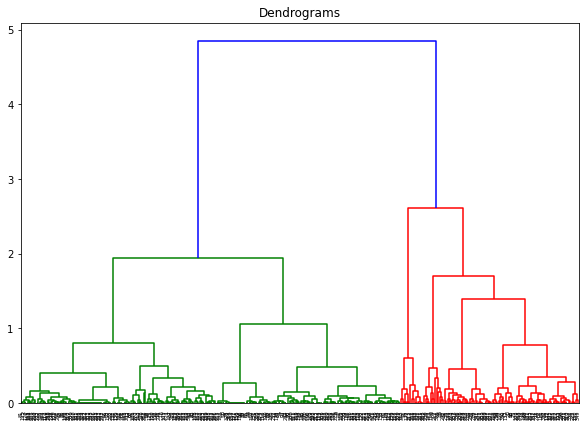

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
yhat_lab=cluster.fit_predict(data_scaled)

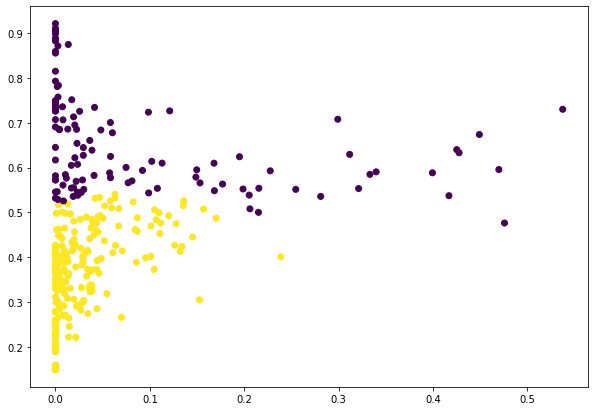

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['betcent'], data_scaled['degcent'], c=cluster.labels_) 


In [ ]:
#print(yhat_lab)
#print(Cdf.index)
yhat=[]
for i in range(len(Cdf)):
    yhat.append([int(Cdf.index[i]),yhat_lab[i]])
print(yhat)

[[1, 0], [2, 1], [3, 1], [4, 0], [5, 1], [6, 1], [7, 0], [8, 1], [9, 1], [10, 1], [13, 1], [15, 0], [16, 1], [17, 1], [19, 1], [20, 1], [21, 1], [23, 1], [25, 0], [26, 1], [28, 1], [29, 0], [31, 1], [32, 1], [33, 1], [34, 1], [35, 0], [36, 1], [37, 0], [39, 1], [41, 0], [44, 0], [45, 0], [46, 0], [47, 1], [51, 1], [52, 1], [53, 1], [54, 1], [55, 1], [56, 1], [57, 1], [60, 0], [61, 1], [62, 0], [64, 0], [65, 1], [66, 1], [68, 1], [69, 0], [70, 0], [71, 1], [72, 1], [74, 1], [75, 1], [76, 1], [77, 0], [78, 1], [79, 1], [80, 1], [81, 1], [83, 1], [86, 1], [87, 1], [88, 1], [89, 1], [93, 0], [94, 1], [95, 0], [96, 0], [97, 0], [99, 0], [100, 1], [101, 0], [103, 0], [104, 0], [105, 1], [106, 0], [107, 0], [108, 1], [109, 1], [110, 1], [111, 1], [112, 1], [113, 0], [114, 1], [115, 1], [116, 1], [119, 1], [120, 1], [122, 1], [125, 1], [127, 1], [129, 1], [131, 0], [132, 1], [133, 1], [134, 1], [135, 0], [137, 1], [138, 1], [139, 1], [140, 1], [141, 1], [142, 1], [143, 1], [144, 1], [145, 1], 

In [ ]:
print(Graph)
rat={}
#for i in range(len(Graph)):
for i in range(len(Graph)):
    if Graph['dst'][i] in rat:
        rat[Graph['dst'][i]].append(Graph['rating'][i])
    else:
        rat[Graph['dst'][i]]=[Graph['rating'][i]]

      src  dst  rating
0       6    2       4
1       6    5       2
2       1   15       1
3       4    3       7
4      13   16       8
...   ...  ...     ...
2081   13  353       6
2082   33   35       4
2083   96    6     -10
2084  215   33       1
2085   33  215       1

[2086 rows x 3 columns]


In [ ]:
d={}
print(Cdf.index[200:])
for i in Cdf.index:
    if int(i) in rat:
        d[int(i)]=sum(rat[int(i)])/len(rat[int(i)])
yhat=[]
for i in range(len(Cdf)):
    if Cdf.index[i] in d:
        yhat.append([int(Cdf.index[i]),yhat_lab[i],d[Cdf.index[i]]])
print(yhat)

Float64Index([240.0, 241.0, 242.0, 243.0, 244.0, 245.0, 246.0, 247.0, 248.0,
              249.0,
              ...
              390.0, 391.0, 392.0, 393.0, 394.0, 395.0, 396.0, 397.0, 398.0,
              399.0],
             dtype='float64', name='node', length=160)
[[1, 0, 3.730337078651685], [2, 1, 3.6818181818181817], [3, 1, 2.769230769230769], [4, 0, 3.32], [5, 1, 2.3333333333333335], [6, 1, 2.3529411764705883], [7, 0, 3.0892857142857144], [8, 1, 5.666666666666667], [9, 1, 2.0], [10, 1, 6.0], [13, 1, 2.24], [15, 0, 1.75], [16, 1, 8.0], [17, 1, 2.909090909090909], [19, 1, 3.8], [20, 1, 3.25], [21, 1, 3.764705882352941], [23, 1, 3.3076923076923075], [25, 0, 3.111111111111111], [26, 1, 1.0], [28, 1, 1.6], [29, 0, 1.5714285714285714], [31, 1, 1.5], [32, 1, 1.0], [33, 1, 2.125], [34, 1, 1.0], [35, 0, 2.090909090909091], [36, 1, 2.0], [37, 0, 1.2857142857142858], [39, 1, 3.0526315789473686], [41, 0, 1.8285714285714285], [44, 0, 1.0], [45, 0, 2.888888888888889], [46, 0, 1.0], [47, 1, 2

In [ ]:
yhat=pd.DataFrame(yhat)
yhat.columns=['node','cluster','avg_rating']
yhat

,node,cluster,avg_rating
0,1,0,3.730337
1,2,1,3.681818
2,3,1,2.769231
3,4,0,3.320000
4,5,1,2.333333
...,...,...,...
354,395,0,4.500000
355,396,1,1.625000
356,397,0,5.000000
357,398,0,5.000000


In [ ]:
a1=0
a1c=0
a0=0
a0c=0
for i in range(len(yhat)):
    if yhat['cluster'][i]==1:
        a1+=yhat['avg_rating'][i]
        a1c+=1
    else:
        a0+=yhat['avg_rating'][i]
        a0c+=1
print("cluster 1 rating:",a1/a1c)
print("cluster 0 rating:",a0/a0c)

cluster 1 rating: 2.1155357287513903
cluster 0 rating: 1.7230213013837103


In [ ]:
yhat_act={}
if (a1/a1c)>(a0/a0c):
    print("cluster 1 is Trustworthy")
    for i in range(len(yhat)):
        if yhat['cluster'][i]==1:
            yhat_act[yhat['node'][i]]="TrustWorthy"
        else:
            yhat_act[yhat['node'][i]]="UnTrustWorthy"
        
else:
    print("Cluster 0 is trustworthy")
    for i in range(len(yhat)):
        if yhat['cluster'][i]==0:
            yhat_act[yhat['node'][i]]="TrustWorthy"
        else:
            yhat_act[yhat['node'][i]]="UnTrustWorthy"
print(yhat_act)

cluster 1 is Trustworthy
{1: 'UnTrustWorthy', 2: 'TrustWorthy', 3: 'TrustWorthy', 4: 'UnTrustWorthy', 5: 'TrustWorthy', 6: 'TrustWorthy', 7: 'UnTrustWorthy', 8: 'TrustWorthy', 9: 'TrustWorthy', 10: 'TrustWorthy', 13: 'TrustWorthy', 15: 'UnTrustWorthy', 16: 'TrustWorthy', 17: 'TrustWorthy', 19: 'TrustWorthy', 20: 'TrustWorthy', 21: 'TrustWorthy', 23: 'TrustWorthy', 25: 'UnTrustWorthy', 26: 'TrustWorthy', 28: 'TrustWorthy', 29: 'UnTrustWorthy', 31: 'TrustWorthy', 32: 'TrustWorthy', 33: 'TrustWorthy', 34: 'TrustWorthy', 35: 'UnTrustWorthy', 36: 'TrustWorthy', 37: 'UnTrustWorthy', 39: 'TrustWorthy', 41: 'UnTrustWorthy', 44: 'UnTrustWorthy', 45: 'UnTrustWorthy', 46: 'UnTrustWorthy', 47: 'TrustWorthy', 51: 'TrustWorthy', 52: 'TrustWorthy', 53: 'TrustWorthy', 54: 'TrustWorthy', 55: 'TrustWorthy', 56: 'TrustWorthy', 57: 'TrustWorthy', 60: 'UnTrustWorthy', 61: 'TrustWorthy', 62: 'UnTrustWorthy', 64: 'UnTrustWorthy', 65: 'TrustWorthy', 66: 'TrustWorthy', 68: 'TrustWorthy', 69: 'UnTrustWorthy', 7

In [ ]:
cluster_trust=[]
for i in range(1,NumVertices+1):
  if i in yhat_act:
    cluster_trust.append(yhat_act[i])
  else:
    cluster_trust.append("UnTrustWorthy")


In [ ]:
set(TrueLabel)

{'TrustWorthy', 'UnTrustWorthy'}

In [ ]:
set(cluster_trust)

{'TrustWorthy', 'UnTrustWorthy'}

In [ ]:
len(cluster_trust)

400

##PERFORMANCE EVALUATION - 2 for CLUSTERING ALGO##

In [ ]:
from sklearn.metrics import confusion_matrix
results_cf[1]=confusion_matrix(TrueLabel, cluster_trust)
print(results_cf[1])

[[ 53  35]
 [192 120]]


In [ ]:
y_aggl_true=[1 if i=='TrustWorthy' else 0 for i in TrueLabel]
y_aggl_pred=[1 if i=='TrustWorthy' else 0 for i in cluster_trust]

In [ ]:
from sklearn.metrics import accuracy_score
results_accuracy[1]=accuracy_score(y_aggl_true, y_aggl_pred)
print(results_accuracy[1])

0.4325


In [ ]:
from sklearn.metrics import precision_score
results_precision[1]=precision_score(y_aggl_true, y_aggl_pred)
print(results_precision[1])

0.2163265306122449


In [ ]:
from sklearn.metrics import recall_score
results_recall[1]=recall_score(y_aggl_true, y_aggl_pred)
print(results_recall[1])

0.6022727272727273


In [ ]:
from sklearn.metrics import f1_score
results_f1[1]=f1_score(y_aggl_true, y_aggl_pred,average="weighted")
print(results_f1[1])

0.4708865610792807


In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_aggl_true, y_aggl_pred)
results_auc[1]=metrics.auc(fpr, tpr)
print(results_auc[1])

0.49344405594405594


##Neighborhood Analysis of Nodes
### To check for patterns in trustworthiness of neighbors


In [ ]:
TrueLabel2=TrueLabel.copy()

In [ ]:
toG={}
for i in range(len(Graph)):
    if i in Graph.index:
        if Graph['dst'][i] in toG:
            toG[Graph['dst'][i]].append(Graph['src'][i])
        else:
            toG[Graph['dst'][i]]=[Graph['src'][i]]
print(toG)    

{2: [6, 21, 10, 61, 1, 54, 132, 142, 146, 110, 149, 166, 156, 39, 7, 135, 4, 198, 167, 13, 202, 115], 5: [6, 7, 1], 15: [1, 97, 70, 77, 96, 167, 239, 297], 3: [4, 21, 17, 10, 7, 2, 64, 217, 269, 397, 1, 361, 115], 16: [13], 10: [13, 21, 1, 41, 6], 21: [2, 10, 36, 39, 132, 114, 7, 72, 219, 284, 93, 308, 60, 257, 77, 1, 235], 20: [2, 17, 1, 61, 7, 23, 235, 77], 1: [21, 10, 5, 13, 32, 34, 31, 35, 17, 8, 47, 54, 56, 71, 74, 78, 68, 81, 101, 119, 100, 76, 77, 111, 138, 110, 145, 114, 7, 165, 75, 2, 60, 225, 29, 227, 104, 33, 64, 247, 234, 251, 261, 177, 271, 274, 141, 180, 311, 312, 308, 304, 139, 324, 356, 384, 399, 144, 219, 320, 51, 215, 266, 39, 396, 353, 9, 19, 270, 23, 112, 134, 350, 178, 41, 36, 309, 57, 4, 171, 143, 241, 132, 6, 125, 135, 330, 192, 115], 8: [21, 10, 1], 23: [17, 32, 69, 108, 1, 77, 113, 19, 263, 7, 104, 112, 2], 6: [10, 5, 4, 32, 7, 35, 77, 258, 268, 219, 1, 280, 149, 2, 135, 13, 96], 25: [10, 80, 119, 57, 149, 310, 363, 156, 178, 309, 304, 13, 135, 113, 342, 192, 3

In [ ]:
uval=[]
tval=[]
for i in toG.keys():
    u=0
    t=0
    for j in toG[i]:
        if TrueLabel2[j]=='UnTrustWorthy':
            u+=1
        else:
            t+=1
    if TrueLabel2[i]=="UnTrustWorthy":
        uval.append(t/(t+u))
    else:
        tval.append(t/(t+u))
print(uval)
print(tval)

[1.0, 1.0, 1.0, 0.75, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6666666666666666, 1.0, 1.0, 0.8571428571428571, 1.0, 0.8181818181818182, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 0.4, 0.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8, 0.75, 0.8, 0.6666666666666666, 0.5, 0.8333333333333334, 1.0, 1.0, 0.6666666666666666, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6666666666666666, 1.0, 1.0, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6666666666666666, 1.0, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 0.75, 0.7142857142857143, 1.0, 0.8, 1.0, 0.6666666666666666, 1.0, 0.5, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6666666666666666, 1.0, 1.0, 0.6666666666666666, 1.0, 0.6666666666666666, 0.8333333333333334, 1.0, 0.625, 1.0, 0.5, 0.5, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.7142857142857143, 1.0, 1.0, 1.0, 0.8, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6666666666666666, 1.0, 1.0, 1.0, 

In [ ]:
import statistics as s
print(s.mean(uval))
print(s.stdev(uval))
print(s.mean(tval))
print(s.stdev(tval))

0.9075569879075415
0.18169869492034532
0.6163273634854728
0.15151621773370652


## CLASSIFICATION BASED ON AVG RATING

In [ ]:
ratsum={}
ratct={}
for i in Graph.index:
    if Graph['dst'][i] in ratsum:
        ratsum[Graph['dst'][i]]+=Graph['rating'][i]
        ratct[Graph['dst'][i]]+=1
    else:
        ratsum[Graph['dst'][i]]=Graph['rating'][i]
        ratct[Graph['dst'][i]]=1
avgr={}
PredLabel={}
for i in range(400):
    if i in ratsum:
        avgr[i]=ratsum[i]/ratct[i]
        if avgr[i]>=0:
            PredLabel[i]="TrustWorthy"
        else:
            PredLabel[i]="UnTrustWorthy"
    else:
        avgr[i]=0
        PredLabel[i]='TrustWorthy'
print(avgr)

{0: 0, 1: 3.730337078651685, 2: 3.6818181818181817, 3: 2.769230769230769, 4: 3.32, 5: 2.3333333333333335, 6: 2.3529411764705883, 7: 3.0892857142857144, 8: 5.666666666666667, 9: 2.0, 10: 6.0, 11: 0, 12: 0, 13: 2.24, 14: 0, 15: 1.75, 16: 8.0, 17: 2.909090909090909, 18: 0, 19: 3.8, 20: 3.25, 21: 3.764705882352941, 22: 0, 23: 3.3076923076923075, 24: 0, 25: 3.111111111111111, 26: 1.0, 27: 0, 28: 1.6, 29: 1.5714285714285714, 30: 0, 31: 1.5, 32: 1.0, 33: 2.125, 34: 1.0, 35: 2.090909090909091, 36: 2.0, 37: 1.2857142857142858, 38: 0, 39: 3.0526315789473686, 40: 0, 41: 1.8285714285714285, 42: 0, 43: 0, 44: 1.0, 45: 2.888888888888889, 46: 1.0, 47: 2.0, 48: 0, 49: 0, 50: 0, 51: 1.8333333333333333, 52: 1.0, 53: 3.0, 54: 2.142857142857143, 55: 1.0, 56: 1.8333333333333333, 57: 2.909090909090909, 58: 0, 59: 0, 60: 2.966666666666667, 61: 2.6666666666666665, 62: 2.0, 63: 0, 64: 1.8055555555555556, 65: 1.0, 66: 2.0, 67: 0, 68: 1.6, 69: 1.75, 70: 1.8, 71: 1.0, 72: 2.5, 73: 0, 74: 1.0, 75: 1.5, 76: 1.66666

In [ ]:
pLabel=[]
for i in range(400):
    pLabel.append(PredLabel[i])

In [ ]:
pLabel.count('TrustWorthy')

396

##EVALUATION FOR AVG RATING BASED MODEL 


In [ ]:
#True Label v/s Avg Rating Classification
from sklearn.metrics import confusion_matrix
results_cf[2] = confusion_matrix(list(TrueLabel), list(pLabel))
print(results_cf[2])

[[ 88   0]
 [308   4]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(TrueLabel2,pLabel))

               precision    recall  f1-score   support

  TrustWorthy       0.22      1.00      0.36        88
UnTrustWorthy       1.00      0.01      0.03       312

     accuracy                           0.23       400
    macro avg       0.61      0.51      0.19       400
 weighted avg       0.83      0.23      0.10       400



In [ ]:
from sklearn.metrics import accuracy_score
results_accuracy[2]=accuracy_score(TrueLabel2, pLabel)
print(results_accuracy[2])

0.23


In [ ]:
from sklearn.metrics import precision_score
results_precision[2]=precision_score(TrueLabel2, pLabel,pos_label="TrustWorthy")
print(results_precision[2])

0.2222222222222222


In [ ]:
from sklearn.metrics import recall_score
results_recall[2]=recall_score(TrueLabel2, pLabel,pos_label="TrustWorthy")
print(results_recall[2])

1.0


In [ ]:
from sklearn.metrics import f1_score
results_f1[2]=f1_score(TrueLabel2, pLabel,pos_label="TrustWorthy")
print(results_f1[2])

0.3636363636363636


In [ ]:
y_true_avg=[1 if i=='TrustWorthy' else 0 for i in TrueLabel]
y_pred_avg=[1 if i=='TrustWorthy' else 0 for i in pLabel]

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_true_avg, y_pred_avg)
results_auc[2]=metrics.auc(fpr, tpr)
print(results_auc[2])

0.5064102564102564



##GETTING CENTRALITY MEASURES FOR NODES



In [ ]:
G

In [ ]:
eig_centrality=nx.eigenvector_centrality(G)
bet_centrality = nx.betweenness_centrality(G, normalized = True,endpoints = False)   
deg_centrality=nx.degree_centrality(G)
pr = nx.pagerank(G, alpha = 0.8) 

In [ ]:
Centralitydf=pd.DataFrame(columns=['betcent','degcent','eigcent','prank'])
for i in range(NumVertices):
    if i in bet_centrality:
        Centralitydf=Centralitydf.append({"betcent":bet_centrality[i],"degcent":deg_centrality[i],
                                          "eigcent":eig_centrality[i],"prank":pr[i]},ignore_index=True)
    else:
        Centralitydf=Centralitydf.append({"betcent":0,"degcent":0,"eigcent":0,'prank':0},ignore_index=True)
print(Centralitydf)
print(TrueLabel2)
cdfcp=Centralitydf.copy()
TLabelcp=TrueLabel2.copy()
predictors=Centralitydf.columns
labelvalues=list(set(TrueLabel2))

         betcent     degcent      eigcent        prank
0              0           0            0            0
1       0.196662    0.289694     0.344391    0.0357323
2      0.0168073    0.091922       0.1755   0.00992535
3     0.00268506   0.0362117    0.0808136   0.00429929
4      0.0335382   0.0779944     0.130394    0.0100039
..           ...         ...          ...          ...
395            0  0.00557103   0.00848139   0.00114517
396   0.00195039   0.0222841    0.0351369   0.00313236
397  0.000977843   0.0139276    0.0192851   0.00223802
398            0  0.00278552  0.000992455  0.000938608
399   0.00158929   0.0194986    0.0369446   0.00263539

[400 rows x 4 columns]
['UnTrustWorthy', 'TrustWorthy', 'TrustWorthy', 'TrustWorthy', 'TrustWorthy', 'UnTrustWorthy', 'TrustWorthy', 'TrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'UnTrustWorthy', 'TrustWorthy', 'UnTrustWorthy', 'TrustWorthy', 'UnTrustWorthy', 'TrustWorthy', 'UnTrustWorthy', 'UnTrustWo

##DECISION TREE CLASSIFIER

In [ ]:
print(len(cdfcp))
print(len(TLabelcp))
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_tree_test = train_test_split(cdfcp,TLabelcp, test_size=0.20,random_state=0)
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train,y_train)

400
400


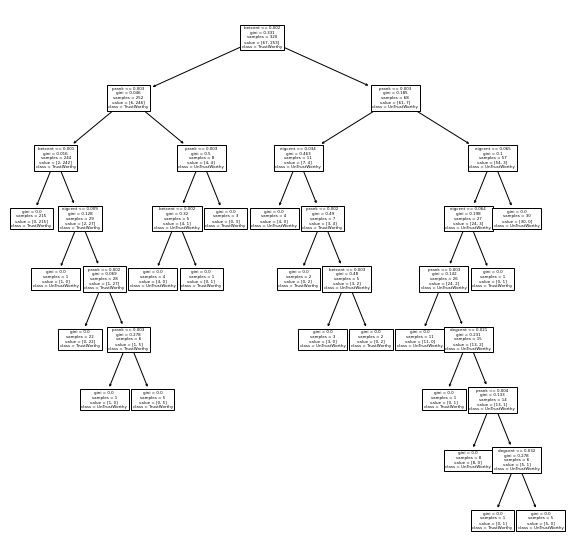

In [ ]:
plt.figure(figsize=(10,10))

tree.plot_tree(clf,feature_names=X_train.columns,class_names=list(set(y_train))) 
plt.show()

In [ ]:
y_tree_pred=clf.predict(X_test)

##PERFORMANCE EVALUATION FOR DECISION TREE CLASSIFIER

In [ ]:
results_cf[3]=confusion_matrix(y_tree_test, y_tree_pred)
print(results_cf[3])
print(classification_report(y_tree_test, y_tree_pred))

[[20  1]
 [ 6 53]]
               precision    recall  f1-score   support

  TrustWorthy       0.77      0.95      0.85        21
UnTrustWorthy       0.98      0.90      0.94        59

     accuracy                           0.91        80
    macro avg       0.88      0.93      0.89        80
 weighted avg       0.93      0.91      0.92        80



In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_tree_test, y_tree_pred, average='weighted')

(0.9257656695156695, 0.9125, 0.9152184146111842, None)

In [ ]:
from sklearn.metrics import accuracy_score
results_accuracy[3]=accuracy_score(y_tree_test, y_tree_pred)
print(results_accuracy[3])

0.9125


In [ ]:
from sklearn.metrics import precision_score
results_precision[3]=precision_score(y_tree_test, y_tree_pred,pos_label="TrustWorthy")
print(results_precision[3])

0.7692307692307693


In [ ]:
from sklearn.metrics import recall_score
results_recall[3]=recall_score(y_tree_test, y_tree_pred,pos_label="TrustWorthy")
print(results_recall[3])  

0.9523809523809523


In [ ]:
from sklearn.metrics import f1_score
results_f1[3]=f1_score(y_tree_test, y_tree_pred,pos_label="TrustWorthy")
print(results_f1[3])

0.8510638297872339


In [ ]:
y_tree_pred=[1 if i=='TrustWorthy' else 0 for i in y_tree_pred]
y_tree_test=[1 if i=='TrustWorthy' else 0 for i in y_tree_test]

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_tree_test, y_tree_pred)
results_auc[3]=metrics.auc(fpr, tpr)
print(results_auc[3])

0.9253430185633575


##K NEIGHBOURS CLASSIFICATION

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_knn_test = train_test_split(cdfcp,TLabelcp, test_size=0.20,random_state=5)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_knn_pred = classifier.predict(X_test)

##PERFORMANCE EVALUATION FOR K NEIGBOURS


In [ ]:

from sklearn.metrics import classification_report, confusion_matrix
results_cf[4]=confusion_matrix(y_knn_test, y_knn_pred)
print(results_cf[4])
print(classification_report(y_knn_test, y_knn_pred))

[[ 8  3]
 [ 3 66]]
               precision    recall  f1-score   support

  TrustWorthy       0.73      0.73      0.73        11
UnTrustWorthy       0.96      0.96      0.96        69

     accuracy                           0.93        80
    macro avg       0.84      0.84      0.84        80
 weighted avg       0.93      0.93      0.93        80



In [ ]:
from sklearn.metrics import accuracy_score
results_accuracy[4]=accuracy_score(y_knn_test, y_knn_pred)
print(results_accuracy[4])  

0.925


In [ ]:
from sklearn.metrics import precision_score
results_precision[4]=precision_score(y_knn_test, y_knn_pred,pos_label="TrustWorthy")
print(results_precision[4])  

0.7272727272727273


In [ ]:
from sklearn.metrics import recall_score
results_recall[4]=recall_score(y_knn_test, y_knn_pred,pos_label="TrustWorthy")
print(results_recall[4])  

0.7272727272727273


In [ ]:
from sklearn.metrics import f1_score
results_f1[4]=f1_score(y_knn_test, y_knn_pred,average="weighted")
print(results_f1[4])  

0.925


In [ ]:
y_knn_pred=[1 if i=='TrustWorthy' else 0 for i in y_knn_pred]
y_knn_test=[1 if i=='TrustWorthy' else 0 for i in y_knn_test]

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_knn_test, y_knn_pred)
results_auc[4]=metrics.auc(fpr, tpr)
print(results_auc[4])

0.841897233201581


##LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_log_test = train_test_split(cdfcp,TLabelcp, test_size=0.20,random_state=0)
reg = LogisticRegression().fit(X_train, y_train)

y_log_pred=reg.predict(X_test)

##PERFORMANCE EVALUATION FOR LOGISTIC REGRESSION

In [ ]:

results_cf[5]=confusion_matrix(y_log_test, y_log_pred)
print(results_cf[5])
print(classification_report(y_log_test, y_log_pred))

[[ 2 19]
 [ 0 59]]
               precision    recall  f1-score   support

  TrustWorthy       1.00      0.10      0.17        21
UnTrustWorthy       0.76      1.00      0.86        59

     accuracy                           0.76        80
    macro avg       0.88      0.55      0.52        80
 weighted avg       0.82      0.76      0.68        80



In [ ]:
from sklearn.metrics import accuracy_score
results_accuracy[5]=accuracy_score(y_log_test, y_log_pred)
print(results_accuracy[5])  

0.7625


In [ ]:
from sklearn.metrics import precision_score
results_precision[5]=precision_score(y_log_test, y_log_pred,pos_label="TrustWorthy")
print(results_precision[5])  

1.0


In [ ]:
from sklearn.metrics import recall_score
results_recall[5]=recall_score(y_log_test, y_log_pred,pos_label="TrustWorthy")
print(results_recall[5])  

0.09523809523809523


In [ ]:
from sklearn.metrics import f1_score
results_f1[5]=f1_score(y_log_test, y_log_pred,average="weighted")
print(results_f1[5])  

0.6808711520152332


In [ ]:
y_log_pred=[1 if i=='TrustWorthy' else 0 for i in y_log_pred]
y_log_test=[1 if i=='TrustWorthy' else 0 for i in y_log_test]

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_log_test, y_log_pred)
results_auc[5]=metrics.auc(fpr, tpr)
print(results_auc[5])

0.5476190476190477


##RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_rand_test = train_test_split(cdfcp,TLabelcp, test_size=0.20,random_state=0)
clf = RandomForestClassifier(max_depth=2, random_state=2)
clf.fit(X_train, y_train)
y_rand_pred=clf.predict(X_test)

##EVALUATION OF RANDOM FOREST CLASSIFIER

In [ ]:
results_cf[6]=(confusion_matrix(y_rand_test, y_rand_pred))
print(results_cf[6])
print(classification_report(y_rand_test, y_rand_pred))

[[21  0]
 [ 5 54]]
               precision    recall  f1-score   support

  TrustWorthy       0.81      1.00      0.89        21
UnTrustWorthy       1.00      0.92      0.96        59

     accuracy                           0.94        80
    macro avg       0.90      0.96      0.92        80
 weighted avg       0.95      0.94      0.94        80



In [ ]:
from sklearn.metrics import accuracy_score
results_accuracy[6]=accuracy_score(y_rand_test, y_rand_pred)
print(results_accuracy[6])  

0.9375


In [ ]:
from sklearn.metrics import precision_score
results_precision[6]=precision_score(y_rand_test, y_rand_pred,pos_label="TrustWorthy")
print(results_precision[6])  

0.8076923076923077


In [ ]:
from sklearn.metrics import recall_score
results_recall[6]=recall_score(y_rand_test, y_rand_pred,pos_label="TrustWorthy")
print(results_recall[6])  

1.0


In [ ]:
from sklearn.metrics import f1_score
results_f1[6]=f1_score(y_rand_test, y_rand_pred,average="weighted")
print(results_f1[6])  

0.9394417247222746


In [ ]:
y_rand_pred=[1 if i=='TrustWorthy' else 0 for i in y_rand_pred]
y_rand_test=[1 if i=='TrustWorthy' else 0 for i in y_rand_test]

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_rand_test, y_rand_pred)
results_auc[6]=metrics.auc(fpr, tpr)
print(results_auc[6])

0.9576271186440678


##CONSOLIDATING THE PERFORMANCES

In [ ]:
results=pd.DataFrame(columns=['cf matrix', 'accuracy','precision','recall','f1', 'auc'], 
                     index=['gf','agglomerative','avg rating','decision tree','knn',
                            'logistic','random forest'])

In [ ]:
results['cf matrix']=results_cf
results['accuracy']=results_accuracy
results['precision']=results_precision
results['recall']=results_recall
results['f1']=results_f1
results['auc']=results_auc

In [ ]:
results

,cf matrix,accuracy,precision,recall,f1,auc
gf,"[[20, 68], [74, 238]]",0.6450,0.212766,0.227273,0.649128,0.495047
agglomerative,"[[53, 35], [192, 120]]",0.4325,0.216327,0.602273,0.470887,0.493444
avg rating,"[[88, 0], [308, 4]]",0.2300,0.222222,1.000000,0.363636,0.506410
decision tree,"[[20, 1], [6, 53]]",0.9125,0.769231,0.952381,0.851064,0.925343
knn,"[[8, 3], [3, 66]]",0.9250,0.727273,0.727273,0.925000,0.841897
logistic,"[[2, 19], [0, 59]]",0.7625,1.000000,0.095238,0.680871,0.547619
random forest,"[[21, 0], [5, 54]]",0.9375,0.807692,1.000000,0.939442,0.957627
